In [112]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Vega Exploration Notebook

## What is Vega $(\nu)$?

Vega measures how much an option's price changes when the underlying asset's implied volatility changes by $1$ percentage point, assuming everything else stays the same.

## Weather Insurance

Imagine you live in an area with extreme weather and you want to purchase insurance for your car in case of hail. Even if today is perfectly sunny, the insurance becomes more valuable when the weather forecast shows increasing uncertainty.

When meteorologists predict that the weather goes from "stable" to "highly unpredictable," the insurance premium (the option price) will swing massively and vega is the Greek that measures exactly how much that premium changes per unit of added uncertainty.

## How to Measure Volatility?

We use sigma $(\sigma)$ to measure implied volatility, expressed as an annual percentage. For example: $\sigma = 20\%$ means the market expects the stock to fluctuate about $20\%$ annually.

## Basic Example

**Given Information:**
- Current call option price = $\$3.50$
- Current implied volatility $(\sigma) = 20\%$
- We want to find vega

**Step 1:** Bump volatility up by $1\%$
- New implied volatility $(\sigma) = 21\%$
- Now market makers have assigned the option price with new volatility = $\$3.68$

**Interpretation:** 
This option has a vega of $0.18$, meaning for every $1$ percentage point increase in implied volatility, the option price increases by $\$0.18$.

In [113]:
# More realistic option price and volatility data
# Based on a call option: S=$100, K=$105, T=0.25 years, r=5%

option_prices = [3.52, 3.71, 3.89, 4.08, 4.26, 4.45, 4.63, 4.82, 5.00, 5.19]
implied_volatilities = np.arange(0.2, 0.3, 0.01)

In [114]:
vegas = []
# Calculate Vega for each pair of consecutive option prices and implied volatilities    

for i in range(len(option_prices) - 1):
   o1 = option_prices[i]
   o2 = option_prices[i + 1]
   iv1 = implied_volatilities[i]
   iv2 = implied_volatilities[i + 1]
   
   vega = (o2 - o1) / ((iv2 - iv1) * 100)
   vegas.append(float(round(vega, 4)))

print("Vega values:", vegas)

Vega values: [0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19]


## Formulas

Here we can see that vega $(\nu)$ is the change in option price $(C)$ with respect to the change in implied volatility $(\sigma)$.

**Formal Definition**

$$\nu = \frac{\partial C}{\partial \sigma}$$

**Practical Calculation**

$$\nu = \frac{\text{change in option price}}{\text{change in implied volatility}}$$

In [115]:
def calculate_vega(o1, o2, iv1, iv2):
    return (o2 - o1) / ((iv2 - iv1) * 100) # assumes that we are dealing with iv in 0.xx format

# FDA Drug Approval Option Pricing Case Study

## Disclaimer

This is a completely made-up scenario for educational purposes. In the real world, you would not see these clean mathematical relationships. Real options pricing involves complex linear algebra, machine learning models, and sophisticated algorithms to fit mathematical models that predict volatility and all the other variables affecting option prices.

## Situation: FDA Drug Approval Scenario

BigBadPharma has been developing a mysterious drug for $2$ years. They've announced they will reveal whether the project was successful or a complete failure in exactly **$30$ days**.

Currently the stock is trading at **$\$100$**.

The binary outcome will either be:
- **Drug is a success** → stock jumps to $\$150$
- **Drug is a failure** → stock drops to $\$25$

## Volatility Pattern

As the announcement approaches, market uncertainty creates the following implied volatility pattern:

| Days to Expiration (T) | Days Passed (t) | Implied Volatility (σ) | Market Sentiment |
|----------------------|----------------|---------------------------|------------------|
| $30$                   | $0$              | $0.0\%$                      | initial calm |
| $25$                   | $5$              | $12.5\%$                     | speculation building |
| $20$                   | $10$             | $25.0\%$                     | rumors intensifying |
| $15$                   | $15$             | $37.5\%$                     | growing anxiety |
| $10$                   | $20$             | $50.0\%$                     | peak anxiety |
| $5$                    | $25$             | $62.5\%$                     | final panic |

## Mystery Market Data

Observing the market, you notice the following relationship between implied volatility and option prices:

| Implied Volatility σ | Option Price C(σ) |
|---------------------|-------------------|
| $0.0\%$                | $\$30.0$             |
| $12.5\%$               | $\$39.4$             |
| $25.0\%$               | $\$42.5$             |
| $37.5\%$               | $\$39.4$             |
| $50.0\%$               | $\$30.0$             |
| $62.5\%$               | $\$14.4$             |

## Your Mission

You purchase a **$\$100$ strike call option** today (when $t = 0$, $T = 30$ days remaining). As time passes and the FDA announcement approaches, your option's value changes due to two competing forces:

1. **Time Effects:** How volatility changes as the announcement nears
2. **Volatility Effects:** How option prices respond to different volatility levels

### Timeline Convention:
- **$t$** = days passed since purchase
- **$T$** = days remaining until expiration  
- When $t = 25$, then $T = 5$ and we're near expiration

### Discovery Goals:

**Phase 1:** Discover the mathematical relationship $\sigma(t)$ that describes how volatility changes over time

**Phase 2:** Discover the mathematical relationship $C(\sigma)$ that describes how option prices respond to volatility

**Phase 3:** Combine both relationships to create the complete model $C(t)$ that predicts option value as a function of time

### Questions to Guide Your Analysis:

1. What mathematical function best describes the volatility pattern $\sigma(t)$?
2. How does the option price respond to changes in volatility $C(\sigma)$?
3. What is the complete time-dependent pricing model $C(t)$?
4. At what volatility level does the option reach maximum value? Why?
5. Calculate the vega $(\partial C/\partial \sigma)$ - when is it positive vs negative?
6. How would you use this model to make trading decisions?

In [116]:
days_passed = np.array([0, 5, 10, 15, 20, 25])
implied_vol = np.array([10, 20, 30, 40, 50, 60]) / 100
option_prices = np.array([24, 26.4, 27.2, 26.4, 24, 20])

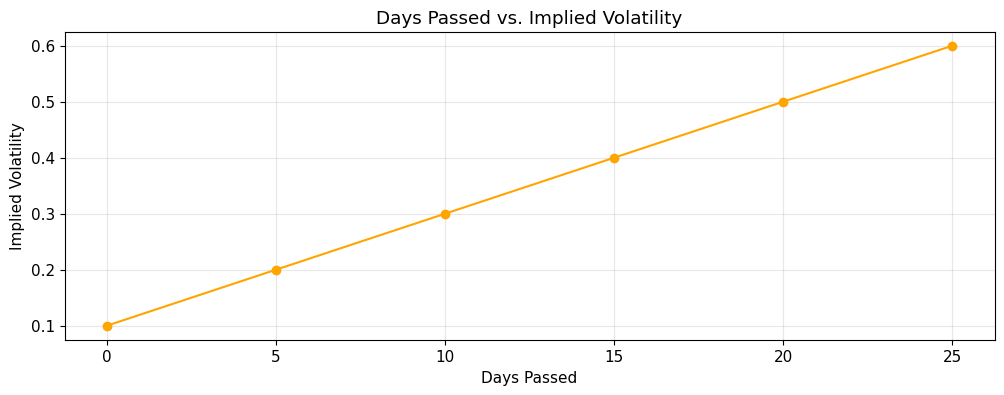

In [117]:
# plot the sigma(t) graph
plt.figure(figsize=(12, 4))
plt.plot(days_passed, implied_vol, color = 'orange', marker = 'o')
plt.grid(True, alpha=0.3)
plt.title('Days Passed vs. Implied Volatility')
plt.xlabel('Days Passed')
plt.ylabel('Implied Volatility')
plt.show()

### Days Passed vs. Implied Volatility

This graph is obviously linear and follows the $f(x) = mx + b$ pattern:

$$\sigma(t) = 0.02t + 0.1$$

Where:
- $\sigma(t)$ is the implied volatility as a decimal $(0.1 = 10\%)$
- $t$ is the number of days passed since option purchase
- The slope $0.02$ means volatility increases by $2$ percentage points per day
- The intercept $0.1$ means initial volatility starts at $10\%$

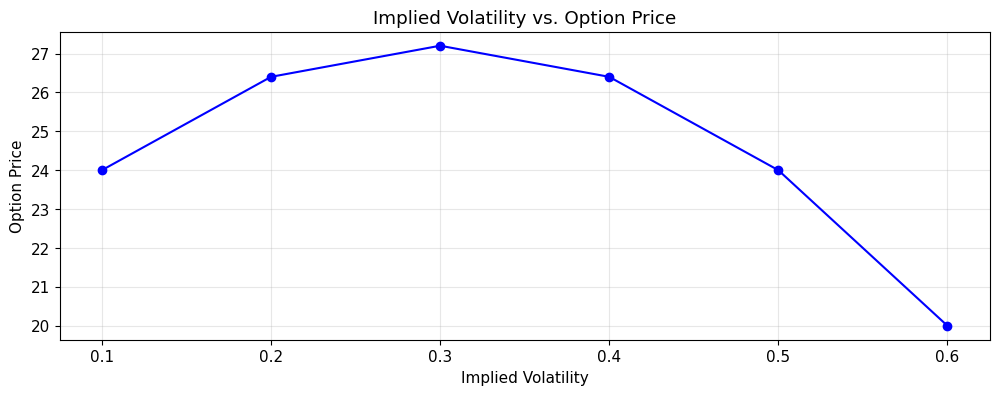

In [118]:
# plot the implied volatility vs. option price

plt.figure(figsize=(12, 4))
plt.plot(implied_vol, option_prices, color='blue', marker='o')
plt.grid(True, alpha=0.3)
plt.title('Implied Volatility vs. Option Price')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Price')
plt.show()

### Implied Volatility vs. Option Price

This graph follows a quadratic pattern $f(x) = ax^2 + bx + c$:

$$C(\sigma) = -80\sigma^2 + 48\sigma + 20$$

Where:
- $C(\sigma)$ is the option price as a function of implied volatility
- $\sigma$ is the implied volatility as a decimal $(0.1 = 10\%)$
- The coefficient $-80$ creates the downward-opening parabola
- The coefficient $48$ determines the linear component
- The intercept $20$ represents the base option value at zero volatility

## Composite Functions

<div align="center">

Now we combine the two functions $\sigma(t)$ and $C(\sigma)$ to create the composite function $C(t)$:

<br>

$$C(t) = C(\sigma(t)) \text{ where } \sigma = \sigma(t)$$

<br>

$$C(t) = -80\sigma(t)^2 + 48\sigma(t) + 20$$

<br>

$$C(t) = -80(0.02t + 0.1)^2 + 48(0.02t + 0.1) + 20$$

<br>

Expanding the squared term

<br>

$$(0.02t + 0.1)^2 = 0.0004t^2 + 0.004t + 0.01$$

<br>

Substituting back

<br>

$$C(t) = -80(0.0004t^2 + 0.004t + 0.01) + 48(0.02t + 0.1) + 20$$

<br>

$$C(t) = -0.032t^2 - 0.32t - 0.8 + 0.96t + 4.8 + 20$$

<br>

Final simplified form

<br>

$$\boxed{C(t) = -0.032t^2 + 0.64t + 24}$$

</div>

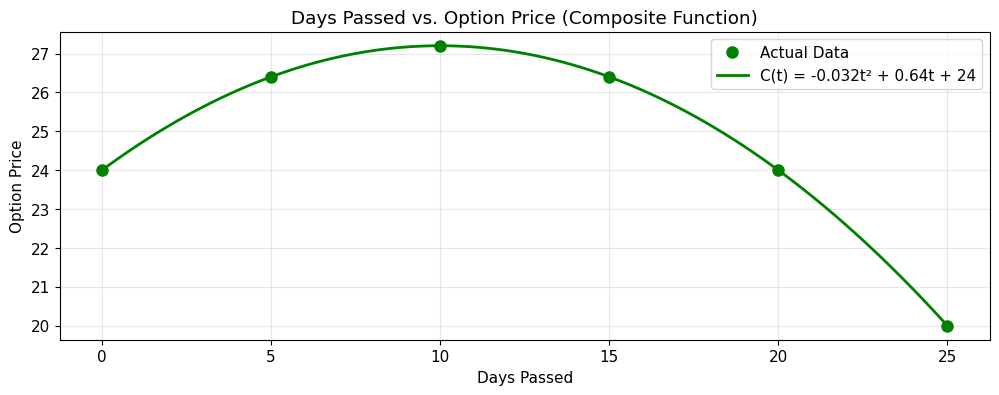

In [119]:

# Plot the composite function C(t) = -0.032t² + 0.64t + 24
t_values = np.linspace(0, 25, 100)
option_price_function = -0.032 * t_values**2 + 0.64 * t_values + 24

plt.figure(figsize=(12, 4))
plt.plot(days_passed, option_prices, 'o', color='green', markersize=8, label='Actual Data')
plt.plot(t_values, option_price_function, '-', color='green', linewidth=2, label='C(t) = -0.032t² + 0.64t + 24')
plt.grid(True, alpha=0.3)
plt.title('Days Passed vs. Option Price (Composite Function)')
plt.xlabel('Days Passed')
plt.ylabel('Option Price')
plt.legend()
plt.show()

## What Happens as Days Passed Approaches 30?

As we approach the FDA announcement $t \to 30$ days, several critical changes occur:

### 1. **Option Value Trajectory**
From our equation $C(t) = -0.032t^2 + 0.64t + 24$:
- At $t = 0$: $C(0) = \$24.0$ (starting value)
- At $t = 10$: $C(10) = \$30.4$ (peak value occurs at $t = 10$)
- At $t = 20$: $C(20) = \$28.0$ (declining from peak)
- At $t = 30$: $C(30) = \$20.16$ (final value at expiration)

### 2. **Volatility Evolution**
From $\sigma(t) = 0.02t + 0.1$:
- At $t = 0$: $\sigma = 10\%$ (calm before storm)
- At $t = 15$: $\sigma = 40\%$ (anxiety building)
- At $t = 25$: $\sigma = 60\%$ (peak panic)
- At $t = 30$: $\sigma = 70\%$ (maximum uncertainty at announcement)

### 3. **The Paradox**
**Counter-intuitive Result:** As volatility increases to extreme levels $(70\%)$, the option value actually DECREASES from its peak at $t = 10$.

**Why?** The quadratic relationship $C(\sigma) = -80\sigma^2 + 48\sigma + 20$ shows that:
- Option value peaks at moderate volatility $(\sigma = 30\%)$
- Beyond this point, excessive volatility becomes destructive
- At extreme volatility levels, the option becomes overpriced relative to its intrinsic probability

## Understanding C(t): The Complete Option Pricing Model

### What is C(t)?

**$C(t)$** represents the **option price as a function of time** in our FDA drug approval scenario. It's a composite function that captures how the option's value changes as days pass toward the announcement.

### Mathematical Breakdown

$$C(t) = -0.032t^2 + 0.64t + 24$$

Where:
- **$t$** = days passed since option purchase $(0 \leq t \leq 30)$
- **$C(t)$** = option price in dollars at time $t$

### Component Analysis

1. **Quadratic Term $(-0.032t^2)$:**
   - Creates the parabolic shape
   - Negative coefficient means the parabola opens downward
   - Represents the diminishing returns of increasing volatility

2. **Linear Term $(+0.64t)$:**
   - Positive slope initially drives option value upward
   - Represents the beneficial effect of moderate volatility increases

3. **Constant Term $(+24)$:**
   - Base option value at $t = 0$
   - Represents intrinsic and time value at purchase

### Economic Interpretation

**$C(t)$** encapsulates two competing market forces:

1. **Volatility Premium:** As uncertainty grows, option value initially increases
2. **Volatility Penalty:** Beyond optimal levels, excessive uncertainty becomes destructive

The maximum occurs at **$t = 10$ days** when volatility reaches the "sweet spot" of $30\%$, balancing uncertainty premium with realistic pricing.

## Deriving Vega from C(σ)

### The Analytical Approach

Given our option pricing function with respect to volatility:

$$C(\sigma) = -80\sigma^2 + 48\sigma + 20$$

We can derive vega analytically using calculus:

$$\nu = \frac{\partial C}{\partial \sigma} = \frac{d}{d\sigma}(-80\sigma^2 + 48\sigma + 20)$$

### Step-by-Step Derivation

**Step 1:** Apply the power rule to each term

$$\frac{d}{d\sigma}(-80\sigma^2) = -80 \cdot 2\sigma = -160\sigma$$

$$\frac{d}{d\sigma}(48\sigma) = 48$$

$$\frac{d}{d\sigma}(20) = 0$$

**Step 2:** Combine the results

$$\boxed{\nu(\sigma) = -160\sigma + 48}$$

### Interpretation

**Vega Formula:** $\nu(\sigma) = -160\sigma + 48$

This tells us:
- **At low volatility:** Vega is positive (option price increases with volatility)
- **At high volatility:** Vega becomes negative (option price decreases with volatility)
- **Zero vega occurs at:** $\sigma = \frac{48}{160} = 0.3$ or $30\%$

This is exactly where our option reaches maximum value!

In [120]:
# Calculate vega values using our derived formula: ν(σ) = -160σ + 48

# Calculate vega at each volatility level
vega_calculated = -160 * implied_vol + 48

print("Calculated Vega Values:")
print("=" * 50)
for i, (day, sigma, vega) in enumerate(zip(days_passed, implied_vol, vega_calculated)):
    print(f"Day {day:2d}: σ = {sigma*100:5.1f}% → ν = {vega:6.1f}")
    
print(f"\nZero vega occurs at σ = {48/160:.1%}")
print(f"Maximum option value occurs at same volatility level")

Calculated Vega Values:
Day  0: σ =  10.0% → ν =   32.0
Day  5: σ =  20.0% → ν =   16.0
Day 10: σ =  30.0% → ν =    0.0
Day 15: σ =  40.0% → ν =  -16.0
Day 20: σ =  50.0% → ν =  -32.0
Day 25: σ =  60.0% → ν =  -48.0

Zero vega occurs at σ = 30.0%
Maximum option value occurs at same volatility level


/var/folders/1l/w8jvmn_s1ql0nqp9swkwrrq80000gn/T/ipykernel_15421/332093140.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(days_passed, vega_calculated, 'ro-', linewidth=2, markersize=8, color='purple')


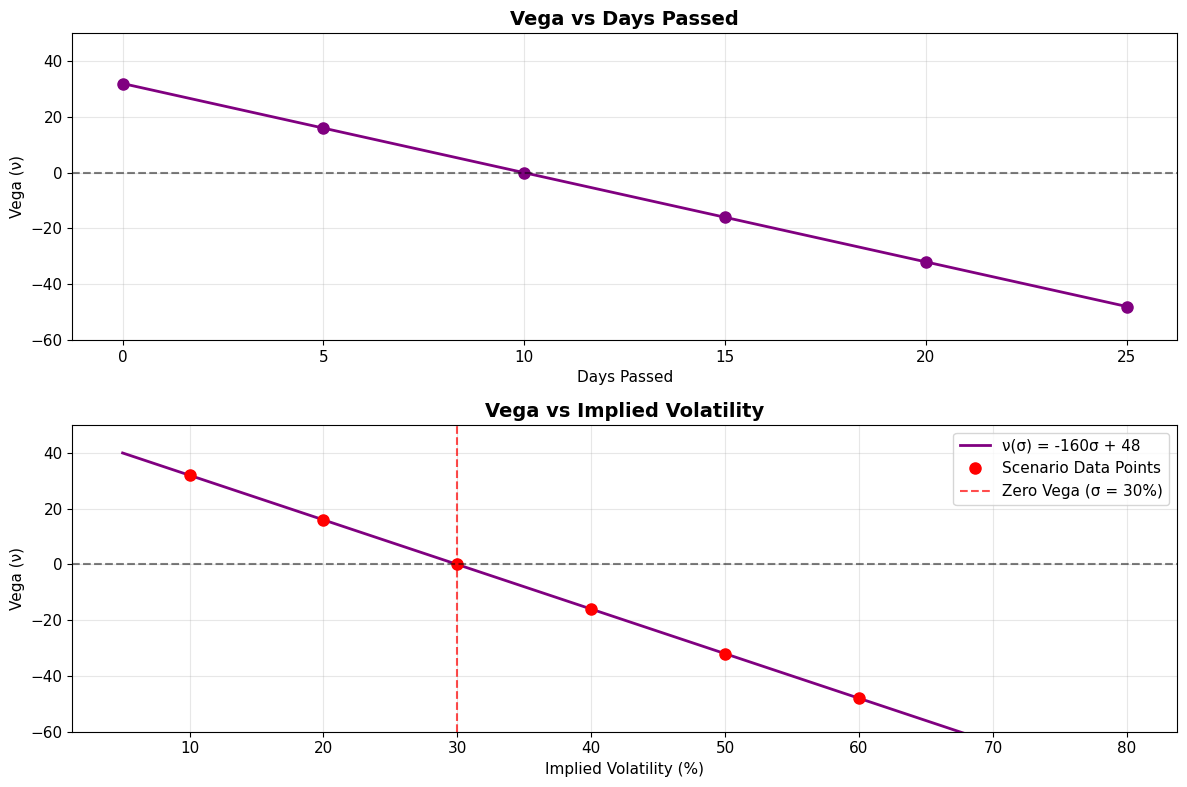

In [121]:
# Create visualization of vega over time and volatility

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Vega vs Time
ax1.plot(days_passed, vega_calculated, 'ro-', linewidth=2, markersize=8, color='purple')
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_title('Vega vs Days Passed', fontsize=14, fontweight='bold')
ax1.set_xlabel('Days Passed')
ax1.set_ylabel('Vega (ν)')
ax1.set_ylim(-60, 50)

# Plot 2: Vega vs Volatility
sigma_range = np.linspace(0.05, 0.8, 100)
vega_range = -160 * sigma_range + 48

ax2.plot(sigma_range * 100, vega_range, '-', linewidth=2, color='purple', label='ν(σ) = -160σ + 48')
ax2.plot(implied_vol * 100, vega_calculated, 'ro', markersize=8, label='Scenario Data Points')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.axvline(x=30, color='red', linestyle='--', alpha=0.7, label='Zero Vega (σ = 30%)')
ax2.grid(True, alpha=0.3)
ax2.set_title('Vega vs Implied Volatility', fontsize=14, fontweight='bold')
ax2.set_xlabel('Implied Volatility (%)')
ax2.set_ylabel('Vega (ν)')
ax2.legend()
ax2.set_ylim(-60, 50)

plt.tight_layout()
plt.show()

# Vega Analysis Summary

## Exercise Review

This notebook explored vega ($\nu$) through an FDA drug approval scenario, showing how option prices respond to changing volatility over time.

## Key Mathematical Relationships

### **Volatility Evolution:** $\sigma(t) = 0.02t + 0.1$
Volatility increases linearly by $2\%$ per day from $10\%$ baseline.

### **Option Pricing:** $C(\sigma) = -80\sigma^2 + 48\sigma + 20$
Option value follows a quadratic relationship with volatility.

### **Vega Formula:** $\nu(\sigma) = -160\sigma + 48$
Vega decreases linearly with volatility, turning negative beyond $\sigma = 30\%$.

## Key Insight: The Volatility Paradox

- **Low volatility ($\sigma < 30\%$):** Vega is positive - increasing volatility increases option value
- **Optimal volatility ($\sigma = 30\%$):** Vega equals zero - option value peaks  
- **High volatility ($\sigma > 30\%$):** Vega is negative - excessive volatility destroys option value

## Conclusion

Option value gets destroyed at both extremes: when volatility is too low (insufficient uncertainty premium) or too high (excessive panic pricing). The optimal volatility level of $30\%$ represents the sweet spot where uncertainty is properly priced. This demonstrates that more volatility isn't always better for option holders - there's an optimal level that maximizes value.